# Нейронные сети с TensorFlow


Установка (https://www.tensorflow.org/)
* pip3 install tensorflow
* pip3 install tensorflow-gpu

In [1]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = (12,6)
plt.rc('font', family='Arial')
# plt.style.use('ggplot')

np.set_printoptions(suppress=True)

In [2]:
import tensorflow as tf

Tensor types:
* const - no input, return constant value (number, vector, tensor)
* variable - value can be changed
* placeholder - model input
* functions - different operations on input data, (e.g. add)
* ...

In [3]:
# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)  # input data (object-feature matrix)
linear_model = W * x + b
y = tf.placeholder(tf.float32)  # answers

$$ loss = \sum{((w^{T}x + b) - y)^{2}} $$

In [4]:
# loss
loss = tf.reduce_sum(tf.square(linear_model - y))  # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
    sess.run(train, {x: x_train, y: y_train})

In [5]:
# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

W: [-0.9999969] b: [ 0.99999082] loss: 5.69997e-11


![Graph](https://www.tensorflow.org/images/getting_started_final.png)

### Линейная модель с TF

In [6]:
# Declare list of features. We only have one numeric feature. There are many
# other types of columns that are more complicated and useful.
feature_columns = [tf.feature_column.numeric_column("x", shape=[1])]

# An estimator is the front end to invoke training (fitting) and evaluation
# (inference). There are many predefined types like linear regression,
# linear classification, and many neural network classifiers and regressors.
# The following code provides an estimator that does linear regression.
estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns)

# TensorFlow provides many helper methods to read and set up data sets.
# Here we use two data sets: one for training and one for evaluation
# We have to tell the function how many batches
# of data (num_epochs) we want and how big each batch should be.
x_train = np.array([1., 2., 3., 4.])
y_train = np.array([0., -1., -2., -3.])
x_eval = np.array([2., 5., 8., 1.])
y_eval = np.array([-1.01, -4.1, -7, 0.])
input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=None, shuffle=True)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_eval, batch_size=4, num_epochs=1000, shuffle=False)

# We can invoke 1000 training steps by invoking the  method and passing the
# training data set.
estimator.train(input_fn=input_fn, steps=1000)

# Here we evaluate how well our model did.
train_metrics = estimator.evaluate(input_fn=train_input_fn)
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)
print("train metrics: %r"% train_metrics)
print("eval metrics: %r"% eval_metrics)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\d_pch\\AppData\\Local\\Temp\\tmp2jdb43m6', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\d_pch\AppData\Local\Temp\tmp2jdb43m6\model.ckpt.
INFO:tensorflow:loss = 11.0, step = 1
INFO:tensorflow:global_step/sec: 1098.9
INFO:tensorflow:loss = 0.130569, step = 101 (0.093 sec)
INFO:tensorflow:global_step/sec: 1086.95
INFO:tensorflow:loss = 0.017284, step = 201 (0.092 sec)
INFO:tensorflow:global_step/sec: 1162.79
INFO:tensorflow:loss = 0.00668199, step = 301 (0.086 sec)
INFO:tensorflow:global_step/sec: 1190.48
INFO:tensorflow:loss = 0.0010505, step = 401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1388.86
INFO:ten

INFO:tensorflow:Starting evaluation at 2017-10-19-13:20:45
INFO:tensorflow:Restoring parameters from C:\Users\d_pch\AppData\Local\Temp\tmp2jdb43m6\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-10-19-13:20:46
INFO:tensorflow:Saving dict for global step 1000: average_loss = 3.27348e-09, global_step = 1000, loss = 1.30939e-08
INFO:tensorflow:Starting evaluation at 2017-10-19-13:20:47
INFO:tensorflow:Restoring parameters from C:\Users\d_pch\AppData\Local\Temp\tmp2jdb43m6\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-10-19-13:20:47
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.00253032, global_step = 1000, loss = 0.0101213
train metrics: {'average_loss': 3.2734822e-09, 'loss': 1.3093929e-08, 'global_step': 1000}
eval metrics: {'average_loss': 0.0025303173, 'loss': 0.010121269, 'global_step': 1000}


In [7]:
def model_fn(features, labels, mode):
    # Build a linear model and predict values
    W = tf.get_variable("W", [1], dtype=tf.float64)
    b = tf.get_variable("b", [1], dtype=tf.float64)
    y = W * features['x'] + b
    # Loss sub-graph
    loss = tf.reduce_sum(tf.square(y - labels))
    # Training sub-graph
    global_step = tf.train.get_global_step()
    optimizer = tf.train.GradientDescentOptimizer(0.01)
    train = tf.group(optimizer.minimize(loss),
                     tf.assign_add(global_step, 1))
    # EstimatorSpec connects subgraphs we built to the
    # appropriate functionality.
    return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=y,
        loss=loss,
        train_op=train)

In [8]:
estimator = tf.estimator.Estimator(model_fn=model_fn)
# define our data sets
x_train = np.array([1., 2., 3., 4.])
y_train = np.array([0., -1., -2., -3.])
x_eval = np.array([2., 5., 8., 1.])
y_eval = np.array([-1.01, -4.1, -7, 0.])
input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=None, shuffle=True)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_eval, batch_size=4, num_epochs=1000, shuffle=False)

# train
estimator.train(input_fn=input_fn, steps=1000)
# Here we evaluate how well our model did.
train_metrics = estimator.evaluate(input_fn=train_input_fn)
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)
print("train metrics: %r"% train_metrics)
print("eval metrics: %r"% eval_metrics)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\d_pch\\AppData\\Local\\Temp\\tmp1dr4e1en', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\d_pch\AppData\Local\Temp\tmp1dr4e1en\model.ckpt.
INFO:tensorflow:loss = 5.31238924081, step = 1
INFO:tensorflow:global_step/sec: 1176.49
INFO:tensorflow:loss = 0.0117196774021, step = 101 (0.087 sec)
INFO:tensorflow:global_step/sec: 1234.55
INFO:tensorflow:loss = 0.0019682759094, step = 201 (0.081 sec)
INFO:tensorflow:global_step/sec: 1123.61
INFO:tensorflow:loss = 0.000457477356799, step = 301 (0.089 sec)
INFO:tensorflow:global_step/sec: 1136.37
INFO:tensorflow:loss = 6.5703743939e-05, step = 401 (0.088 sec)
INFO:tensor

INFO:tensorflow:Starting evaluation at 2017-10-19-13:21:13
INFO:tensorflow:Restoring parameters from C:\Users\d_pch\AppData\Local\Temp\tmp1dr4e1en\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-10-19-13:21:14
INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 9.99193e-12
INFO:tensorflow:Starting evaluation at 2017-10-19-13:21:14
INFO:tensorflow:Restoring parameters from C:\Users\d_pch\AppData\Local\Temp\tmp1dr4e1en\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-10-19-13:21:15
INFO:tensorflow:Saving dict for global step 1000: global_step = 1000, loss = 0.0101004
train metrics: {'loss': 9.9919257e-12, 'global_step': 1000}
eval metrics: {'loss': 0.010100388, 'global_step': 1000}


### Обучение на базе MNIST с TF

Загрузим наши данные

In [9]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


![mnist sample](https://www.tensorflow.org/images/MNIST-Matrix.png)

In [10]:
def plot_images_separately(images):
    "Plot the six MNIST images separately."
    fig = plt.figure()
    for j in range(1, 7):
        ax = fig.add_subplot(1, 6, j)
        ax.matshow(np.reshape(images[j-1], (28, 28)), cmap = plt.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()

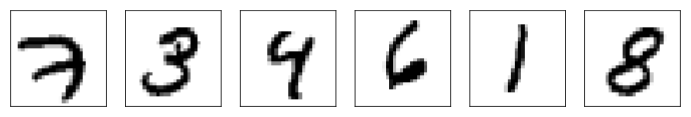

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


In [11]:
plot_images_separately(mnist.train.images)
print(mnist.train.labels[0:6])

Единицы соответствуют индексу класса

### Однослойная нейронная сеть

Построим модель в tensorflow. Tensorflow - это графический фраемворк, предназначенный в первую очередь для работы с нейронными сетями. На самом деле Вы можете создавать здесь любые алгоритмы машинного обучения. Основная идея работы с tensorflow - вы описываете порядок, в котором создаются переменные и выполняются операции, после чего запускаете обсчёт всего графа. 

В примере ниже мы создаем простейщую модель: 
$y = \mbox{softmax}(Wx + b)$

In [23]:
X = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([784,10]), dtype=tf.float32)
b = tf.Variable(tf.zeros([10]), dtype=tf.float32)

In [54]:
# Здесь как вычислять y
linear_model = tf.matmul(X, W) + b
y = tf.nn.sigmoid(linear_model)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))

# А затем задаем кросс-энтропию в качестве петрики и SGD в качестве оптимизатора
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y, axis=1), 
                                           tf.argmax(y_, axis=1)), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(1000):
        # берем очередной батч
        X_train, y_train = mnist.train.next_batch(32)
        # и обучаемся на нем
        sess.run(train, {X: X_train, y_: y_train})
    X_test, y_test = mnist.test.next_batch(1024)
    # Предсказание и выисление accuracy
    accuracy.eval({X: X_test, y_: y_test})

0.80761719

Обратите внимание, что в tensorflow существует два вида перменных. 
tf.placeholder - переменные, значения которых подаются из вне. 
tf.Variable - переменные, которые как-то определяются внутри графа и могут зависеть от внешних переменных. Только tf.Variable могут быть обучаемыми переменными. 